# **Predicting Boston House Prices With Regression**
Assume that we we want to predict the value of a property in a certain city (in our case Boston) for that it would be necessary some analysis, this project has such analyzes and foresees for us the value of the property.



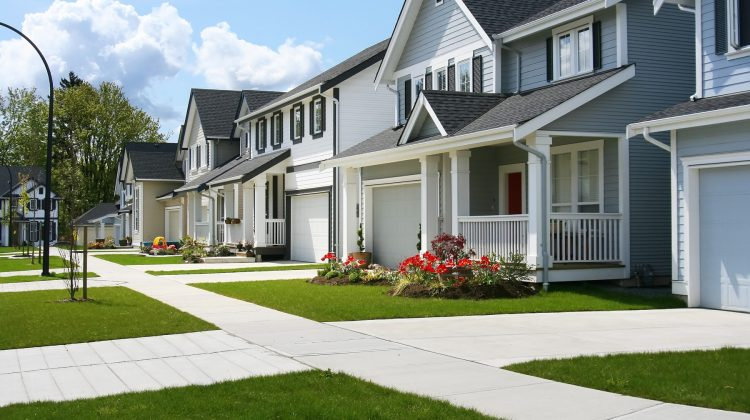

In [ ]:
import pandas as pd # Dataframe
import seaborn as sns # Data Visualization
import numpy as np # Arrays, Metrices and Mathematical Functions
import matplotlib.pyplot as plt # Statistic, Animated and Interactive Visualizations

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Dataset**
The dataset is from sklearn dataset.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

#**Dataset Characteristics**

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# **Creating a DataFrame**
Let's create a dataframe and preview the 5 first lines of our dataframe

In [ ]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)

In [ ]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Transforming in CSV file.
data.to_csv('data.csv')

Let's add the target variable

In [ ]:
data['MEDV'] = boston.target

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Resumo Estatístico da base de dados.

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# **Exploratory Data Analysis**

At this stage our goal is to know the data we are working on.
We can use the Pandas Profile tool


In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 47.5MB 7.4MB/s
     |████████████████████████████████| 71kB 1.9MB/s 
     |████████████████████████████████| 71kB 4.4MB/s 
     |████████████████████████████████| 604kB 12.3MB/s 
     |████████████████████████████████| 3.1MB 13.8MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 296kB 36.6MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=d681b0d9e9054f76df3f716c42d50ed2d4c178f149d992cddf761591d63c3eaa
  Stored in directory: /tmp/pip-ephem-wheel-cache-sdvbs332/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=8d5e39711e74e745f741998014d1dc9a870b5229a58c2f70d01b0d6ac1646fd4
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=2919

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(data, title='Report - Pandas Profiling', html={'style':{'full_width':True}})
profile

**Observations**

* The correlation coefficient varies from ** - 1 ** to ** 1 **. If the value is close to ** 1 **, this means that there is a strong positive correlation between the variables. When this number is close to ** - 1 **, the variables have a strong negative correlation.
* The report we performed above shows us that our target variable (*** MEDV ***) is strongly correlated with the variables *** LSTAT *** and *** RM ***

* *** RAD *** and *** TAX *** are strongly correlated, we can remove them from our model to avoid multi-collinearity.
* The same happens with the columns *** DIS *** and *** AGE *** which has the correlation of ** - 0.75 **
* The column *** ZN *** has ** 73% ** of zero values.

In [ ]:
profile.to_file(output_file='Relatório01.html')

Checking for Missing Values

In [ ]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Checking for correlations manually

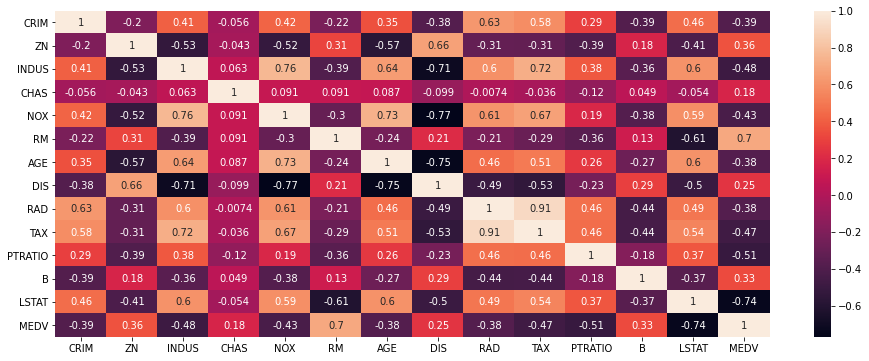

In [ ]:
correlacoes = data.corr()
plt.figure(figsize = (16, 6))
sns.heatmap(data=correlacoes, annot=True)

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(data, x=data.RM, y=data.MEDV)
fig.show()


Lower population status index and property price.

In [ ]:
fig = px.scatter(data, x=data.LSTAT, y=data.MEDV)
fig.show()

Pupil-teacher ratio by town and property price

In [ ]:
fig = px.scatter(data, x=data.PTRATIO, y=data.MEDV)
fig.show()


Analyzing outliers

In [ ]:
# Descriptive statistics 
data.RM.describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [ ]:
import plotly.figure_factory as ff
labels = ['Distribution of the RM (Number of Rooms) variable']
fig = ff.create_distplot([data.RM], labels, bin_size=.2)
fig.show()

In [ ]:
# Checking for Outliers in the RM variable
fig = px.box(data, y='RM')
fig.update_layout( width=800, height=800)
fig.show()



Viewing the distribution of the MEDV variable


In [ ]:
data.MEDV.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [ ]:
labels = ['Distribution of the variable MEDV (Average property price)']
fig = ff.create_distplot([data.MEDV], labels, bin_size=.2)
fig.show()


We realized that we have a positive asymmetric distribution

To make sure that we have an asymmetric distribution, it is important to do a test, and for that we can use Pearson's coefficient

In [ ]:
# Let's analyze the symmetry of the data
from scipy import stats

In [ ]:
stats.skew(data.MEDV)

1.104810822864635


Checking the documentation of the coefficient to interpret


* Value between -1 and 1 symmetric distribution
* Value greater than 1 positive asymmetric distribution
* Value greater than -1 negative asymmetric distribution




Let's see the histogram of the variable MEDV (Target variable)

In [ ]:
fig = px.histogram(data, x="MEDV", nbins=50, opacity=0.50)
fig.show()

In [ ]:
# Checking for outliers in MEDV variable
fig = px.box(data, y='MEDV')
fig.update_layout(width=800, height=800)

In [ ]:
# Descriptive statistics of variables
data[['PTRATIO', 'LSTAT', 'RM', 'MEDV']].nlargest(16, 'MEDV')

,PTRATIO,LSTAT,RM,MEDV
161,14.7,1.73,7.489,50.0
162,14.7,1.92,7.802,50.0
163,14.7,3.32,8.375,50.0
166,14.7,3.70,7.929,50.0
186,17.8,4.45,7.831,50.0
195,14.4,2.97,7.875,50.0
204,14.7,2.88,8.034,50.0
225,17.4,4.63,8.725,50.0
257,13.0,5.12,8.704,50.0
267,13.0,7.44,8.297,50.0



We noticed above a discrepancy between the values

In [ ]:
top16 = data.nlargest(16, 'MEDV').index

In [ ]:
data.drop(top16, inplace=True)


So we delete those outliers that would not contribute to the creation of an accurate model

In [ ]:
import plotly.figure_factory as ff
labels = ['Distribuição da variável MEDV (Número de quartos)']
fig = ff.create_distplot([data.MEDV], labels, bin_size=.2)
fig.show()


As the graph above doesn't give us a good visualization, let's plot a histogram

In [ ]:
fig = px.histogram(data, x='MEDV', nbins=50, opacity=0.50)
fig.show()

As we removed the outliers now we will rotate the Pearson coefficient once again


In [ ]:
stats.skew(data.MEDV)

0.7732836030909053

# **What is a Baseline?**


# Defining a Baseline


* A baseline is important to have milestones in the project.
* Allows an easy explanation for everyone involved.
* It is something that we will always try to gain as far as possible.



In [ ]:
# Converting RM variable to integer type to work with number of rooms being an integer
data.RM = data.RM.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     490 non-null    float64
 1   ZN       490 non-null    float64
 2   INDUS    490 non-null    float64
 3   CHAS     490 non-null    float64
 4   NOX      490 non-null    float64
 5   RM       490 non-null    int64  
 6   AGE      490 non-null    float64
 7   DIS      490 non-null    float64
 8   RAD      490 non-null    float64
 9   TAX      490 non-null    float64
 10  PTRATIO  490 non-null    float64
 11  B        490 non-null    float64
 12  LSTAT    490 non-null    float64
 13  MEDV     490 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 57.4 KB


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000
mean,3.643241,11.112245,11.113143,0.059184,0.554307,5.740816,68.27898,3.834519,9.514286,408.002041,18.520000,355.855449,12.92402,21.635918
std,8.722154,22.844626,6.821302,0.236209,0.116688,0.737657,28.16479,2.109948,8.691297,168.065190,2.110478,92.634273,7.08318,7.865301
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.000000,2.90000,1.137000,1.000000,187.000000,12.600000,0.320000,1.98000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.000000,44.55000,2.111050,4.000000,280.250000,17.400000,375.912500,7.34750,16.700000
50%,0.247510,0.000000,9.690000,0.000000,0.538000,6.000000,76.80000,3.275900,5.000000,330.000000,19.100000,391.770000,11.67500,20.900000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.000000,93.87500,5.214600,24.000000,666.000000,20.200000,396.322500,17.11750,24.675000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.000000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,48.800000


In [ ]:
# We will define rules to categorize the data, so we will create a list called CATEGORIES and in the next cell we will add the values
categorias=[]

In [ ]:
# We will iterate the RM values
for i in data.RM.iteritems():
  valor = (i[1])
# So for each value inside RM being stored in the variable "value" let's check ...
  if valor <= 4:
    categorias.append('Pequeno')
# If value is less than or equal to 4 we add Small to our category list
  elif valor < 7:
    categorias.append('Médio')
# If the value is less than 7 we add Medium to our category list
  else:
      categorias.append('Grande')
# If neither is big then we add Big to our list of categories

In [ ]:
# Creating the categories column
data['categorias'] = categorias

In [ ]:
# Print the category count
data.categorias.value_counts()

Médio      424
Grande      52
Pequeno     14
Name: categorias, dtype: int64

In [ ]:
# Group categories and calculate averages
# So for each category (Large, Medium, Small) we will have the average property value for the category
medias_categorias = data.groupby(by='categorias')['MEDV'].mean()

In [ ]:
# Viewing the medias_categorias variable
medias_categorias
# Vimos então que para categoria grande temos que o valor médio dos imoveis são de 35.71 mil dolares
# Para médio temos valor médio de 20 mil dolares
# Para pequeno temos valor médio de 14 mil dolares

categorias
Grande     35.719231
Médio      20.130425
Pequeno    14.921429
Name: MEDV, dtype: float64

In [ ]:
# We will now create our dictionary with the keys medium, large, small so that we can make queries in this dictionary and access its respective values
dic_baseline = {'Grande': medias_categorias[0], 'Médio': medias_categorias[1], 'Pequeno': medias_categorias[2]}

In [ ]:
# Print the dictionary
dic_baseline

{'Grande': 35.71923076923077,
 'Médio': 20.1304245283019,
 'Pequeno': 14.921428571428574}

In [ ]:
# Function to return the house size through the number of the bedroomns
def retorna_baseline(num_quartos):
  if num_quartos <= 4:
    return dic_baseline.get('Pequeno')
  elif num_quartos <=7:
    return dic_baseline.get('Médio')
  elif num_quartos > 7:
    return dic_baseline.get('Grande')

In [ ]:
# Calls function returns baseline(retorna baseline)
data.RM
retorna_baseline(7)

20.1304245283019

In [ ]:
# For each item within the RM variable it brings the number of rooms and the value of the house
for i in data.RM.iteritems():
  num_quartos = (i[1])
  print('O número de quartos é: {}, Valor médio é: {}'.format(num_quartos, retorna_baseline(num_quartos)))

O número de quartos é: 6, Valor médio é: 20.1304245283019
O número de quartos é: 6, Valor médio é: 20.1304245283019
O número de quartos é: 7, Valor médio é: 20.1304245283019
O número de quartos é: 6, Valor médio é: 20.1304245283019
O número de quartos é: 7, Valor médio é: 20.1304245283019
O número de quartos é: 6, Valor médio é: 20.1304245283019
O número de quartos é: 6, Valor médio é: 20.1304245283019
O número de quartos é: 6, Valor médio é: 20.1304245283019
O número de quartos é: 5, Valor médio é: 20.1304245283019
O número de quartos é: 6, Valor médio é: 20.1304245283019
O número de quartos é: 6, Valor médio é: 20.1304245283019
O número de quartos é: 6, Valor médio é: 20.1304245283019
O número de quartos é: 5, Valor médio é: 20.1304245283019
O número de quartos é: 5, Valor médio é: 20.1304245283019
O número de quartos é: 6, Valor médio é: 20.1304245283019
O número de quartos é: 5, Valor médio é: 20.1304245283019
O número de quartos é: 5, Valor médio é: 20.1304245283019
O número de qu

In [ ]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,categorias
0,0.00632,18.0,2.31,0.0,0.538,6,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,Médio
1,0.02731,0.0,7.07,0.0,0.469,6,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,Médio
2,0.02729,0.0,7.07,0.0,0.469,7,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,Grande
3,0.03237,0.0,2.18,0.0,0.458,6,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,Médio
4,0.06905,0.0,2.18,0.0,0.458,7,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,Grande
5,0.02985,0.0,2.18,0.0,0.458,6,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,Médio
6,0.08829,12.5,7.87,0.0,0.524,6,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,Médio
7,0.14455,12.5,7.87,0.0,0.524,6,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,Médio
8,0.21124,12.5,7.87,0.0,0.524,5,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,Médio
9,0.17004,12.5,7.87,0.0,0.524,6,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,Médio


# Working with Baseline
Preparing the data
* The idea here is that we measure the performance of our baseline

In [ ]:
# As we saw in the exploratory data analysis we have to identify the variables that have a high correlation between them
# so let's remove these variables
X = data.drop(['RAD', 'TAX', 'MEDV', 'DIS', 'AGE', 'ZN', 'categorias'], axis=1)

In [ ]:
# Let's store the average of values ​​in the variable y that is our target
y = data['MEDV']

In [ ]:
X.head()

,CRIM,INDUS,CHAS,NOX,RM,PTRATIO,B,LSTAT
0,0.00632,2.31,0.0,0.538,6,15.3,396.90,4.98
1,0.02731,7.07,0.0,0.469,6,17.8,396.90,9.14
2,0.02729,7.07,0.0,0.469,7,17.8,392.83,4.03
3,0.03237,2.18,0.0,0.458,6,18.7,394.63,2.94
4,0.06905,2.18,0.0,0.458,7,18.7,396.90,5.33


In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [ ]:
# Let's separate our dataset, part for training and part for testing
# Then we will import the train test split from sckit-learn
from sklearn.model_selection import train_test_split
# Let's split into a training set 80% and a test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print("X_train: número de linhas e colunas: {}".format(X_train.shape))
print("X_test: número de linhas e colunas: {}".format(X_test.shape))
print("y_train: número de linhas e colunas: {}".format(y_train.shape))
print("y_test: número de linhas e colunas: {}".format(y_test.shape))


X_train: número de linhas e colunas: (392, 8)
X_test: número de linhas e colunas: (98, 8)
y_train: número de linhas e colunas: (392,)
y_test: número de linhas e colunas: (98,)


In [ ]:
X_test.head()

,CRIM,INDUS,CHAS,NOX,RM,PTRATIO,B,LSTAT
245,0.19133,5.86,0.0,0.431,5,19.1,389.13,18.46
456,4.66883,18.10,0.0,0.713,5,20.2,10.48,19.01
75,0.09512,12.83,0.0,0.437,6,18.7,383.23,8.94
238,0.08244,4.93,0.0,0.428,6,16.6,379.41,6.36
362,3.67822,18.10,0.0,0.770,5,20.2,380.79,10.19


In [ ]:
# Creating a list to storage our predictions
predicoes = []

In [ ]:
# Adding values of our prediction in our list
for i in X_test.RM.iteritems():
  num_quartos = i[1]
  predicoes.append(retorna_baseline(num_quartos))

In [ ]:
# 10 lines of our predictions
predicoes[:10]

[20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019,
 20.1304245283019]


# Assigning result on a dataframe


* We will keep a Log throughout the project
* Allows for evolution given the baseline



In [ ]:
# Create an empty dataframe
df_results = pd.DataFrame()

In [ ]:
# Creating a column "valor_real" with the values in y_test variable
df_results['valor_real'] = y_test.values

In [ ]:
# Creating a column "valor_predito_baseline" with the values in predicoes list
df_results['valor_predito_baseline'] = predicoes

In [ ]:
df_results.head(5)

,valor_real,valor_predito_baseline
0,18.5,20.130425
1,12.7,20.130425
2,21.4,20.130425
3,23.7,20.130425
4,20.8,20.130425


In [ ]:

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='lines+markers',
                         name="Valor Real"))
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         name="Valor Predito Baseline"))
fig.show()


In this graph we see that the baseline did not bring us a good forecast for this case, it was far from the real values.

Now we will see our model's performance.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test, predicoes)))

In [ ]:
print('Baseline model performance:')
print('\nRMSE é: {}'.format(rmse))

Baseline model performance:

RMSE é: 7.865380589202804


As we saw the baseline didn’t give us good results, so let’s test some machine learning models in this case linear regression

# Machine Learning
### Linear Regression


* Due to the correlation between some attributes, we can use linear regression.
* Simple and efficient model.
* Quick and robust solution.



In [ ]:
# Importing LinearRegression
from sklearn.linear_model import LinearRegression

In [ ]:
# Creating a variable that will receive Linear Regression
lin_model = LinearRegression()

In [ ]:
# Training our training bases
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Storaging our predictions in y_pred
y_pred = lin_model.predict(X_test)

In [ ]:
# Checking for performance of our Linear Regression
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
print('Performance of the model evaluated with the test data:')
print('\nRMSE é: {}'.format(rmse))

Performance of the model evaluated with the test data:

RMSE é: 4.460277295153906


In [ ]:
# Creating a column with predictions of Linear Regression
df_results['Valor_predito_reg_linear'] = lin_model.predict(X_test)

In [ ]:
df_results.head(10)

,valor_real,valor_predito_baseline,Valor_predito_reg_linear
0,18.5,20.130425,18.459170
1,12.7,20.130425,12.279894
2,21.4,20.130425,24.588307
3,23.7,20.130425,28.254693
4,20.8,20.130425,18.195439
5,25.0,20.130425,21.630648
6,9.7,20.130425,11.319198
7,14.9,20.130425,14.561032
8,34.9,20.130425,31.623717
9,31.6,20.130425,29.588133


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='lines+markers',
                         name="Valor Real"))
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         name="Valor Predito Baseline"))
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.Valor_predito_reg_linear,
                         mode='lines+markers',
                         name="Valor Predito Regressão Linear"))
fig.show()

We saw that our Linear Regression model performed much better than Baseline. Let's test the decision tree



# Decision tree


* Supervised Algorithm, that is, it expects a numerical value, an entry.
* Classification or Regression
* Consists of a tree-shaped representation
* When going through each node the algorithm makes decisions

Trees are built from the induction of rules. For each rule, decisions are made that dictate the structure of the tree.




In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor()

In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Assessing the Decision Tree Model


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df_results['valor_predito_arvore'] = y_pred

In [ ]:
df_results.head()

,valor_real,valor_predito_baseline,Valor_predito_reg_linear,valor_predito_arvore
0,18.5,20.130425,18.459170,17.8
1,12.7,20.130425,12.279894,23.2
2,21.4,20.130425,24.588307,24.5
3,23.7,20.130425,28.254693,24.3
4,20.8,20.130425,18.195439,21.8


In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print('Performance of the model evaluated with the test data:')
print('\nRMSE é: {}'.format(rmse))

Performance of the model evaluated with the test data:

RMSE é: 5.044091309924627


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='lines+markers',
                         name="Valor Real"))
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         name="Valor Predito Baseline"))
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.Valor_predito_reg_linear,
                         mode='lines+markers',
                         name="Valor Predito Regressão Linear"))
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.Valor_predito_reg_linear,
                         mode='lines+markers',
                         name="Valor Predito Arvore"))

We saw that the decision tree did a little better than linear regressio


# Random Forest


* Supervised algorithm.
* Classification or Regression.
* Dozens of trees combined to predict the best outcome.
* Randomness in the selection of attributes instead of the selection from the impurity calculation.
* Solves the decision tree overfitting problem.












In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_regressor = RandomForestRegressor()

In [ ]:
rf_regressor.fit(X_train, y_train, sample_weight=None)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = rf_regressor.predict(X_test)

In [ ]:
df_results['valor_predito_random_forest'] = rf_regressor.predict(X_test)

In [ ]:
df_results.head()

,valor_real,valor_predito_baseline,Valor_predito_reg_linear,valor_predito_arvore,valor_predito_random_forest
0,18.5,20.130425,18.459170,17.8,19.462
1,12.7,20.130425,12.279894,23.2,16.931
2,21.4,20.130425,24.588307,24.5,23.444
3,23.7,20.130425,28.254693,24.3,24.904
4,20.8,20.130425,18.195439,21.8,21.546


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_real,
                         mode='lines+markers',
                         name="Valor Real"))
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_baseline,
                         mode='lines+markers',
                         name="Valor Predito Baseline"))
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.Valor_predito_reg_linear,
                         mode='lines+markers',
                         name="Valor Predito Regressão Linear"))
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.Valor_predito_reg_linear,
                         mode='lines+markers',
                         name="Valor Predito Arvore"))
fig.add_trace(go.Scatter(x=df_results.index,
                         y=df_results.valor_predito_random_forest,
                         mode='lines+markers',
                         name="Valor Predito Random Forest"))

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print('Performance of the model evaluated with the test data:')
print('\nRMSE é: {}'.format(rmse))

Performance of the model evaluated with the test data:

RMSE é: 3.4172819444340705


Random Forest Model is the best for our case.


# **Tunning of the Machine Learning Algorithm**

**RandomForest parameters**


* The parameter n_estimators defines the number of trees that will be used to create the models. The greater the number of trees, the greater the number of models in the ensemble
* The max_deph parameter defines the depth of the tree, the deeper the tree, the more specialized the training data our model will be.
* The max_features parameter defines the maximum number of nodes that will be used to separate the leaf levels from the tree




**Deploy da Aplicação**

In [ ]:
X['MEDV'] = y

In [ ]:
X.head()

,CRIM,INDUS,CHAS,NOX,RM,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.0,0.538,6,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.0,0.469,6,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.0,0.469,7,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.0,0.458,6,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.0,0.458,7,18.7,396.90,5.33,36.2


In [ ]:
X.to_csv('data.csv', index=False)